## Observations and Insights 

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')
comb_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the DataFrame.
num_mice = len(comb_df["Mouse ID"].unique())
num_mice

249

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_id = comb_df[comb_df[['Mouse ID','Timepoint']].duplicated()]
duplicated_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [28]:
num_duplicated_id = len(duplicated_id)
num_duplicated_id

5

In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = comb_df[comb_df['Mouse ID'].isin(duplicated_id["Mouse ID"]) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_df["Mouse ID"].unique())
num_mice

248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimen = clean_df.groupby(['Drug Regimen'])
mean = drug_regimen['Tumor Volume (mm3)'].mean()
med  = drug_regimen['Tumor Volume (mm3)'].median()
var  = drug_regimen['Tumor Volume (mm3)'].var()
std  = drug_regimen['Tumor Volume (mm3)'].std()
SEM  = drug_regimen['Tumor Volume (mm3)'].sem()

summary_statics = pd.DataFrame({'Mean'    :   mean,
                                'Median'  :   med,
                                'Variance':   var,
                                'Std Dev' :   std,
                                'SEM'     :   SEM})

summary_statics



,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# I think is the same task that above

drug_regimen = clean_df.groupby(['Drug Regimen'])
mean = drug_regimen['Tumor Volume (mm3)'].mean()
med  = drug_regimen['Tumor Volume (mm3)'].median()
var  = drug_regimen['Tumor Volume (mm3)'].var()
std  = drug_regimen['Tumor Volume (mm3)'].std()
SEM  = drug_regimen['Tumor Volume (mm3)'].sem()

summary_statics = pd.DataFrame({'Mean'    :   mean,
                                'Median'  :   med,
                                'Variance':   var,
                                'Std Dev' :   std,
                                'SEM'     :   SEM})

summary_statics



,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

<AxesSubplot:title={'center':'Number of Mice per Time Point'}, xlabel='Drug Regimen'>

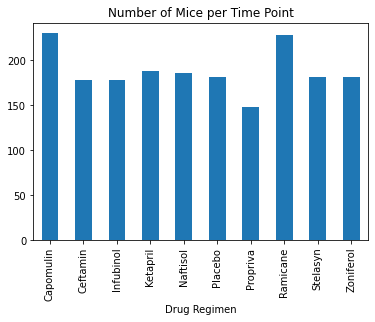

In [50]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

data = drug_regimen["Mouse ID"].count()
data.plot(kind = 'bar', title = 'Number of Mice for Each Treatment', ylabel = 'Number of Mice')




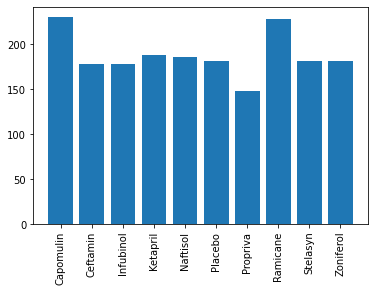

In [55]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

plt.bar(data.index.values, data.values);
plt.xticks(rotation = 'vertical');



## Pie Plots

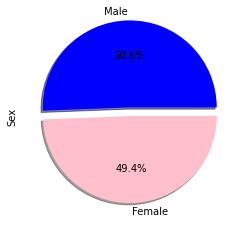

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = comb_df["Sex"].value_counts();
gender.plot(kind = 'pie', colors = ['blue',  'pink'], explode = (0.1, 0), autopct = '%1.1f%%', shadow = True);


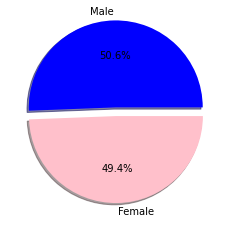

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, colors = ['blue',  'pink'], labels = ['Male', 'Female'], explode = (0.1, 0), autopct = '%1.1f%%', shadow = True);

## Quartiles, Outliers and Boxplots

In [106]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

promise_regimen = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].sort_values(["Timepoint"], ascending=True)
promise_regimen = promise_regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

promise_regimen


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


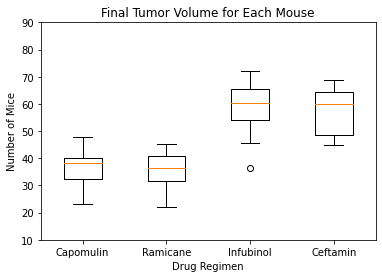

In [113]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

pr_group_df = promise_regimen.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)'].to_frame()
pr_group.head()

# #Create a list to use as labels and dataframe
drug_regimen= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mp_regimens = pr_group_df.reset_index()
tumor_volumes_df = pd.DataFrame(mp_regimens.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list))
tumor_volumes_df = tumor_volumes_df.reindex(drug_regimen)
tumor_volumes_most = [vol for vol in tumor_volumes_df['Tumor Volume (mm3)']]
# tumor_volumes_most

#Boxplot

plt.boxplot(tumor_volumes_most, labels=drug_regimen)
plt.title('Final Tumor Volume for Each Mouse')
plt.ylabel('Number of Mice')
plt.xlabel('Drug Regimen')
plt.ylim(10, 90)
plt.show()




## Line and Scatter Plots

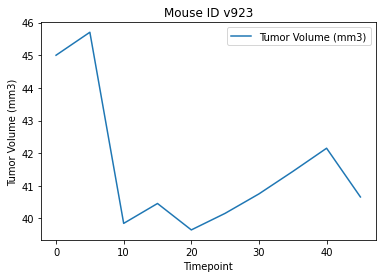

In [127]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_df.query("`Drug Regimen`=='Capomulin'")
capomulin_mouse = capomulin.query("`Mouse ID`=='v923'")
capomulin_mouse = capomulin_mouse[["Timepoint", "Tumor Volume (mm3)"]].set_index("Timepoint")
capomulin_mouse

# plot
capomulin_mouse.plot()
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse ID v923")
plt.show()


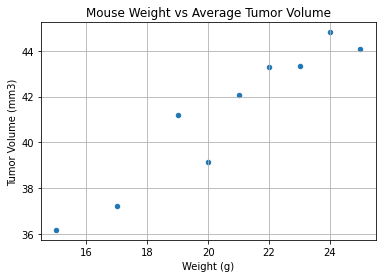

In [166]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin = clean_df.query("`Drug Regimen`=='Capomulin'")
data = capomulin.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean()
data_df = pd.DataFrame(data).reset_index()
# print(data_df)

# Scatter Plot
data_df.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", title = "Mouse Weight vs Average Tumor Volume", grid = True );




## Correlation and Regression

Text(0, 0.5, 'Tumor Volume (mm3)')

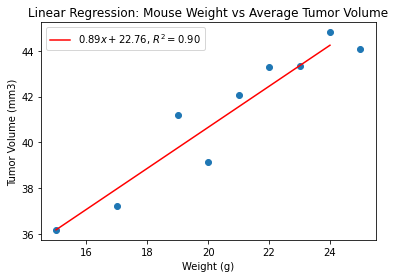

In [185]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Scatter Plot
x = data_df["Weight (g)"];
y = data_df["Tumor Volume (mm3)"];
plt.scatter(x, y, )

#Linear Regression
slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
line_x = np.arange(x.min(), x.max())
line_y = slope * line_x + intercept

#Linear Regression Plot
plt.plot(line_x, line_y, "r", label='$%.2fx + %.2f$, $R^2=%.2f$' % (slope, intercept, r_value**2) )
plt.legend(loc='best')
plt.title("Linear Regression: Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


